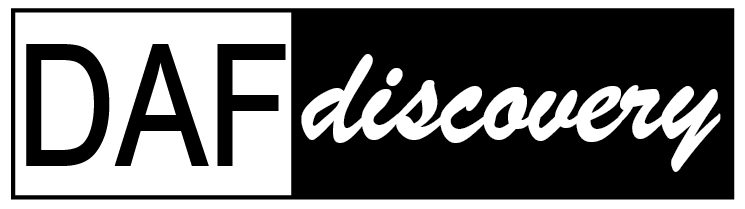

# Data Fusion Discovery Pipeline (DAF*discovery*)


This is the Jupyter Notebook related to [Paper on: LAABio](https://laabioippn.wordpress.com/) for more information

This is a pipeline to merge __previously processed__ data from different (spectral) techniques. 

- Projects might be orgaized into different folders
- Data must be accompanied to a __Metdata__ with a common ID header to index different data from the same sample.

Example: 

Metadata with at least: (1) sample name; (2) NMR code per sample; __Optional:__ (3) MS code per sample; (4) Grouping information; (5) Sample Comment 

processed NMR data (e.g. MNova, TopSpin) and peak intensities/areas exported to a .CSV file 

processed MS data (feature list; e.g. MZmine, MSDial) and peak intensities/areas exported to a .CSV file 

> There are some possibilities to explore: (1) NMR only; (2) NMR + MS; (3) NMR + Bioactivity/Phenotipic data; (4) MS + Bioactivity/Phenotipic data; (5) NMR + MS + Bioactivity/Phenotipic data

> 1. When there is only NMR data, the STOCSY calculation should be done as it is.


> 2. When there are NMR and MS data, and the "STOCSY driver" is chosen from the MS data (a specific feature number), the correlation in the direction of NMR results in a highligthed NMR spectra.

> 3. When there are NMR and MS data, and the "STOCSY driver" is chosen from the NMR data (a specific chemical shift/peak), the correlation in the direction of MS results in a .CSV table with MS feature number + indexed correlation results.

> 4. When there are Bioactivity/Phenotipic data, the "STOCSY driver" should always be chosen from this Bioactivity/Phenotipic data and the correlation in the direction of NMR results in a highligthed NMR spectra and/or the correlation in the direction of MS results in a .CSV table with MS feature number + indexed correlation results.


Note that the output from (1) NMR data is a color coded spectra modulated by Covariance and Correlations, and (2) MS data is a matrix (2 x X samples) indexed by MS feature list and the correlation results so we can add it into Cytoscape to color code MSMS base Molecular Networks.
#### Option 1: NMR + MS + Bioact
#### Option 2: NMR + MS
#### Option 3: NMR + Bioact
#### Option 4: MS + Bioact
#### Option 5: NMR only


In [1]:
# Dependencies to install and import

import numpy as np
import pandas as pd
import warnings
import matplotlib as plt
import matplotlib.pyplot as pltpy
plt.rcParams['pdf.fonttype'] = 42 #set up for Acrobat Illustrator manipulation
plt.rcParams['ps.fonttype'] = 42  #set up for Acrobat Illustrator manipulation
import os
import os.path

# Import

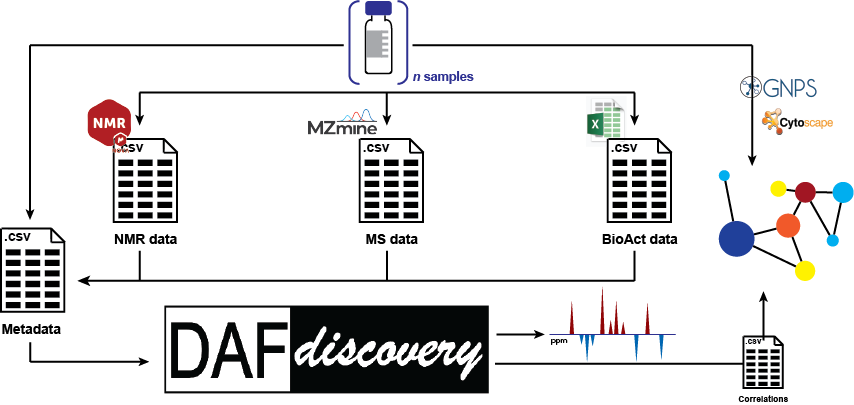


Import each data already processes. __DAF*discovery*__ does not preprocess data; we assume this part is covered (add REF)

__Metadata__ (as .csv) should have 'Samples', 'NMR_filename', 'MS_filename' and/or 'BioAct_filename' as headers

This section will get filenames from the __Metadata__ to reorder the actual data exported from the previous processing steps


In [2]:
# Set Project and Project path inside your main folder
Project = 'CaseI';

os.chdir(Project) # navigate to the Project folder

In [4]:
Metadata = pd.read_csv('Metadata.csv', sep=',',header=0) # Rename the Metadata filename accordingly to your specific case

# Set order from Metadata
if ('NMR_filename') in Metadata.columns and ('MS_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist() 
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: NMR + MS + BioAct. Go for Option 1')
    data_inuse = ['NMR', 'MS', 'BioAct']
    
elif ('NMR_filename') in Metadata.columns and ('MS_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()  
    print('You are about to merge data from: NMR + MS. Go for Option 2')
    data_inuse = ['NMR', 'MS']
    
elif ('NMR_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: NMR + BioAct. Go for Option 3')
    data_inuse = ['NMR', 'BioAct']

elif ('MS_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: MS + BioAct. Go for Option 4')
    data_inuse = ['MS', 'BioAct'] 
    
elif ('NMR_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()    
    print('You are about to work with NMR data alone. Have a look in what more you could do with additional data. . Go for Option 5')
    data_inuse = ['NMR']

    
else: print('Error (sorry!), please check your Metadata')

print(f'Data in Use: {data_inuse}')


You are about to work with NMR data alone. Have a look in what more you could do with additional data. . Go for Option 5
Data in Use: ['NMR']


___
___
## Option 5: NMR only

__Use this cell to work 'NMR' data only__. Check [Paper on: Data Integration ADDref](https://pubs.rsc.org/en/content/articlelanding/2019/fd/c8fd00227d) for more information

In [5]:
if data_inuse == ['NMR']:
    # NMR
    NMR = pd.read_csv('NMR.csv', sep=',',header=0)   # assuming the NMR data was exported and saved as NMR.csv
    NMRdata = NMR.drop(["Unnamed: 0"], axis=1)
    ppm = NMR["Unnamed: 0"]
    
else: print('Try the next one')

# REORDERING data according to the Metadata (Ordered_Samples)

NMR = NMR[Ordered_NMR_filename] # reorder columns according to the sampleIDs
NMR.rename(columns={i:j for i,j in zip(Ordered_NMR_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

print('Data from NMR is reordered according to the Matadata.')

Data from NMR is reordered according to the Matadata.


### STOCSY calculations

Use this cell to apply STOCSY on a given driver peak.

The driver peak should be infromed by the user __in line 5__.

<IPython.core.display.Javascript object>


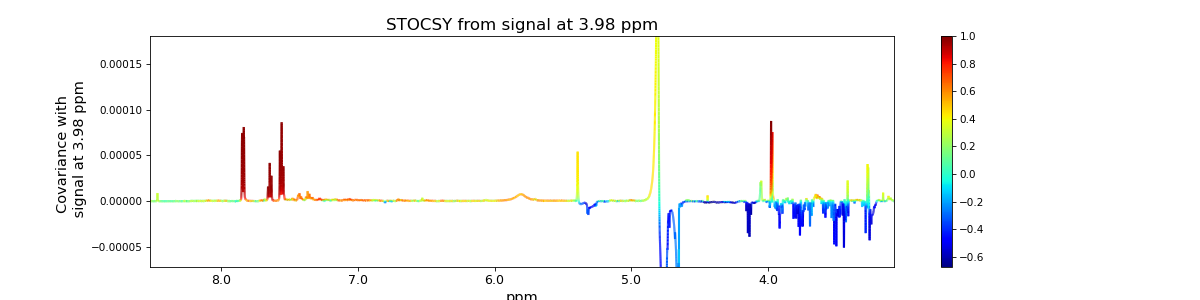

In [6]:
# Chose driver to produce highlighted NMR spectra showing highly correlated peaks
from STOCSY import *
%matplotlib notebook

# DRIVER FROM THE NMR DATA
driver = 3.97795 # Hippuric_acid

corr, covar = STOCSY(driver,NMRdata,ppm)

<IPython.core.display.Javascript object>


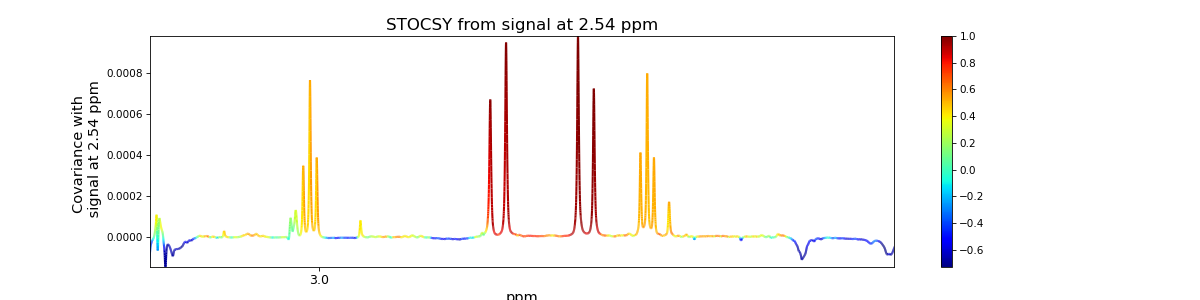

In [7]:
# Chose driver to produce highlighted NMR spectra showing highly correlated peaks
from STOCSY import *
%matplotlib notebook

# DRIVER FROM THE NMR DATA
driver = 2.5372 # citrate

corr, covar = STOCSY(driver,NMRdata,ppm)

### REFERENCES

Cloarec O et. al. Statistical total correlation spectroscopy: an exploratory approach for latent biomarker identification from metabolic 1H NMR data sets. Analytical Chemistry. 2005. [link](https://pubmed.ncbi.nlm.nih.gov/15732908/)

Crockford DJ et. al. Statistical Heterospectroscopy, an Approach to the Integrated Analysis of NMR and UPLC-MS Data Sets:  Application in Metabonomic Toxicology Studies. 2006. [link](https://pubs.acs.org/doi/10.1021/ac051444m)

Borges RM et al. Exploring correlations between MS and NMR for compound identification using essential oils: A pilot study. Phytochemical Analysis. 2022. [link](https://pubmed.ncbi.nlm.nih.gov/35098600/)

Kuhn S. An integrated approach for mixture analysis using MS and NMR techniques. 2019. [link](https://pubs.rsc.org/en/content/articlelanding/2019/fd/c8fd00227d)